<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/Jordan/Bayesian_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# finding the path
!ls ./drive/MyDrive/DS6011_Capstone_VisualNeuroscience/DATA/stackRaw/210725_1/210725_1_10_stackRaw_mc_tm4_t5_syt_.mat

./drive/MyDrive/DS6011_Capstone_VisualNeuroscience/DATA/stackRaw/210725_1/210725_1_10_stackRaw_mc_tm4_t5_syt_.mat


In [ ]:
stackRaw = h5py.File('./drive/MyDrive/DS6011_Capstone_VisualNeuroscience/DATA/stackRaw/210725_1/210725_1_10_stackRaw_mc_tm4_t5_syt_.mat', 'r+')

In [ ]:
# selected a good sample image
image = stackRaw['stackRaw_mc'][80]
nrows, ncols = np.shape(image)


In [ ]:
# #Use builtin caiman function to read array from .mat file
# testmov = cm.base.movies.load(fnames, var_name_hdf5 = 'stackRaw_mc')

In [ ]:
# #visualize the first frame of the movie
# import matplotlib.pyplot as plt
# #.T is important to flip the axes back to original
# plt.imshow(testmov[1000].T)

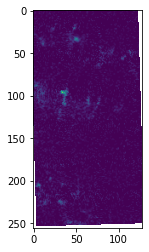

In [ ]:
# display image for reference
plt.figure()
plt.imshow(image)

In [ ]:
# Create and train our Gaussian Mixture Expectation Maximization Model
model = GaussianMixture(n_components=2, tol=0.1)
model.fit(np.nan_to_num(image))
# predict latent values
yhat = model.predict(np.nan_to_num(image))

In [ ]:
# what is it doing??
print(np.shape(np.nan_to_num(image)))
print(np.shape(yhat))
print(np.shape(image[1]))

(256, 128)
(256,)
(128,)


Basically what the GMM is doing here is it is looking row by row and classifying each row as a 1 or a 0 (based on the underlying component it most closely relates to. If we are trying to find a good breakoff point it will be a 0, I think.

We can isolate the class 1 and class 0 rows and display them together.

In [ ]:
row_1 = np.where(yhat == 1)
row_1

(array([ 94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 204, 224, 225, 227]),)

In [ ]:
image2 = np.copy(image)
image2[row_1] = np.full(128, 1000)

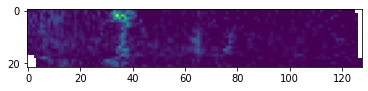

In [ ]:
# displaying only category 1
plt.figure()
plt.imshow(image[row_1])

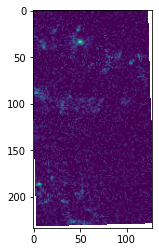

In [ ]:
# display category 0 only to spot visual differences
plt.figure()
plt.imshow(np.delete(image, row_1, axis=0))

In [ ]:
np.shape(image[row_1])

(22, 128)

Now we can display the original image next to one with the first component highlighted. We can see that the main group of class 1 rows is in what appears to be our target zone, where the T5 Dendrites mix with the inputs of the TM cells.

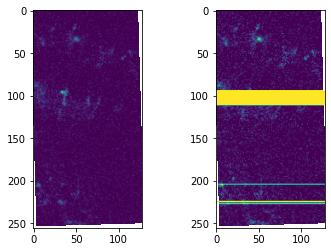

In [ ]:
plt.figure()
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image2)

Our next step is to see if we can zero in on the dark part of the image and try to find a good cut off.

In [ ]:
yhat_prob = model.predict_proba(np.nan_to_num(image))
yhat_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [35]:
ct = 0
# save an array of indexes
ind = []
tick = int(0)
for i in yhat_prob:
  if i[0] == 1:
    ct += 1
    ind = np.append(ind, tick)
    # print(tick)
  tick += 1
print(ct)
print(ind)

234
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93. 112. 113. 114. 115.
 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129.
 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143.
 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157.
 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171.
 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185.
 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199.
 200. 201. 202. 203. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214.
 2

It looks like there is not enough precision to find the absolute darkest areas on the picture.  Needs some work.

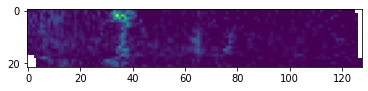

In [39]:
plt.figure()
plt.imshow(np.delete(image, ind.astype(int), axis=0))

In [42]:
np.shape(np.delete(image, ind.astype(int)))

(32534,)

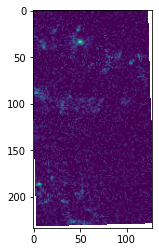

In [45]:
plt.figure()
plt.imshow(image[ind.astype(int)])

In [56]:
image_sum = np.asarray([np.sum(a) for a in np.nan_to_num(image)])
np.sort(image_sum)

array([    0.        ,     0.        ,  1367.19379393,  1454.03534796,
        1463.3510286 ,  1487.24823141,  1503.26256281,  1588.62510542,
        1673.65754239,  1764.81899868,  1815.10109781,  1835.06348864,
        1849.78081204,  1881.63438325,  1902.96872136,  1963.81466891,
        2050.47867294,  2110.39341374,  2125.26479796,  2145.98472609,
        2156.12078598,  2166.261028  ,  2172.0974216 ,  2181.52010363,
        2279.58359404,  2288.25067113,  2324.97353555,  2325.7385315 ,
        2331.52323608,  2345.9232093 ,  2383.261159  ,  2397.93203931,
        2409.77399764,  2430.82682117,  2448.63928099,  2456.7074291 ,
        2463.20110211,  2467.92163684,  2493.20838919,  2502.53502239,
        2507.45544653,  2508.57349096,  2556.21116711,  2558.89398501,
        2573.52746357,  2580.58506585,  2588.91868164,  2621.11521015,
        2621.1506043 ,  2635.87249544,  2639.70491488,  2660.79195858,
        2664.36677504,  2667.16879504,  2674.04864412,  2685.40199068,
      

In [63]:
np.where((image_sum < 2000) & (image_sum > 1900)) # lowest numbers are mostly on the edges

(array([170, 187]),)

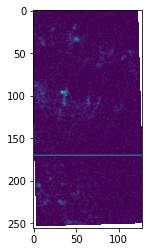

In [64]:
image3 = np.copy(image)
image3[170] = np.full(128, 1000)

plt.figure()
plt.imshow(image3)

It's clear there are a lot of pixels with light on every line.  Maybe our probability thing isn't working right.  Can we make it more sensative??

On the other hand, the darkest element won't be the answer either. Trying a clustering method and disecting the boundry seems like a better option.